## Housing Prices Competition for Kaggle Learn Users

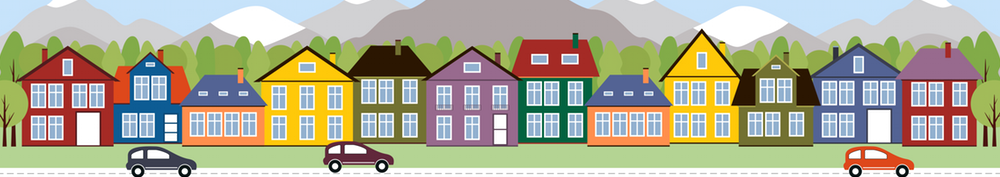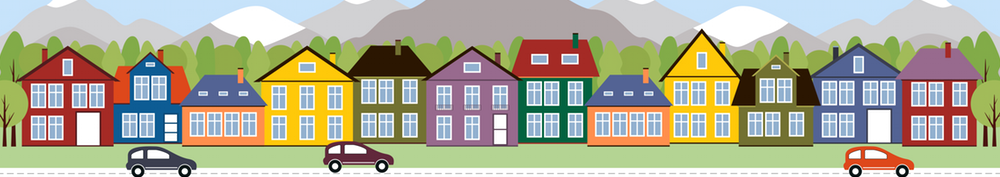

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [52]:
#Importando o os pacotes
import pandas as pd
import numpy as np
!pip install scikit-learn
!pip install matplotlib

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.5 MB 3.7 MB/s eta 0:00:02
   ------------ --------------------------- 2.4/7.5 MB 5.8 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.5 MB 6.5 MB/s eta 0:00:01
   ------------------------------ --------- 5.8/7.5 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------  7.3/7.5 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------------------- ------ 1.3/1.5 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.1 MB/s eta 0:00:00


In [2]:
#Importando o dataset de treino
data = pd.read_csv("C:/Users/Vinicius/Desktop/Kaggle/Housing Prices/train.csv")

In [3]:
#Visualizando os dados
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Retornando o shape dos dados
data.shape

(1460, 81)

In [5]:
# Vendo as informações
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Visualizando os 20 primeiros -  quantidade de valores vazios
(data.isnull().sum()/data.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [7]:
# Podemos eliminar as colunas com mais de 20% de valores vazios
eliminar = data.columns[(data.isnull().sum()/data.shape[0]) >  0.2]
eliminar

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
# Eliminando essas colunas
base = data.drop(eliminar,axis=1)

In [9]:
#Visualizando quantidade de valores vazios
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
WoodDeckSF      0.000000
PavedDrive      0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
dtype: float64

- Vamos eliminar as colunas de texto
- Precisamos escolher tratar os valores vazios
- Vamos escolher alguns algoritmos para testar e um método de avaliação de erro

In [10]:
#Selecionando apenas colunas numéricas
colunas = base.columns[base.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
# Criar uma nova base com esses valores
base2 = base.loc[:,colunas]
base2.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500


In [12]:
#Verificando os valores vazios
base2.isnull().sum().sort_values(ascending=False).head(3)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [13]:
base2 = base2.fillna(-1)

# Criando o meu modelo
- Precisa separar em treino e teste

Conforme: https://scikit-learn.org/1.6/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
#Selecionando o X e o Y
X = base2.drop('SalePrice',axis=1)
y = base2.SalePrice

In [30]:
#Importando o train_test_split
from sklearn.model_selection import train_test_split

In [31]:
#Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# O próximo passo é selecionar os algoritmos que vou utilizar. Com algoritmos menos robustos.
- Regressão Linear;
    - https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html
- Árvore de Regressão;
    - https://scikit-learn.org/1.5/modules/tree.html
- KNNeigboardsRegressor;
    - https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [32]:
#Importando a regressão Linear
from sklearn.linear_model import LinearRegression

In [33]:
#Criando a regressão e fazendo o fit coom os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [34]:
#Fazendo a previsão para os dados de teste
y_rl = reg_rl.predict(X_test)

In [35]:
#Importando  o pacote da árvore de decisão
from sklearn import tree

In [36]:
#Criando o regressor e fazendo o fit com os dados de treino
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [37]:
#Fazendo a previsão
y_ar = reg_ar.predict(X_test)

In [38]:
#Importando o KNN
from sklearn.neighbors import KNeighborsClassifier

In [39]:
#Criando o regressor e fazendo o fit com os dados do treino
reg_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [40]:
y_knn = reg_knn.predict(X_test)

#Agora deve-se avaliar esses dados, utilizando o erro absoluto e o quadrático.
- Erro médio Absoluto
    -https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_absolute_error.html
- Erro quadrático médio
    -https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_squared_error.html

In [41]:
#Importando o Erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [42]:
# Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [43]:
#Avaliando o erro da regressão linear
print(mean_absolute_error(y_test,y_rl))
print(mean_squared_error(y_test,y_rl))

23802.62054087979
1538459666.3792715


In [44]:
#Avaliando o erro da árvore de decisão
print(mean_absolute_error(y_test,y_ar))
print(mean_squared_error(y_test,y_ar))

26693.82572614108
1682730719.020747


In [45]:
#Avaliando o erro do knn
print(mean_absolute_error(y_test,y_knn))
print(mean_squared_error(y_test,y_knn))

43864.85062240664
4510231790.157677


# Visualização dos Gráficos

In [53]:
#Importando a biblioteca
import matplotlib.pyplot as plt

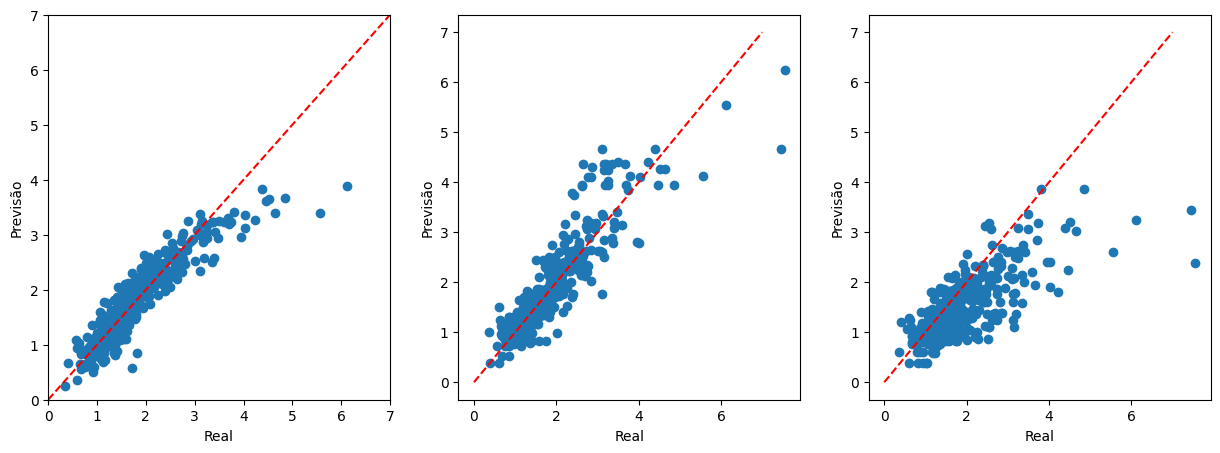

In [54]:
#Criando o gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test/100000, y_rl/100000)
ax[0].plot([0,7], [0,7], '--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,7],[0,7],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,7],[0,7],'--r')

ax[0].set(xlim=(0,7),ylim=(0,7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

- Vou utilizar a Regressão Linear por apresentar o algoritmo com o menor erro quadrático médio, a mesma métrica avaliada pelo Kaggle de classificar os modelos

# Fazendo a previsão de teste da competição

- Agora vou repetir os mesmos tratamentos que fiz na base de treino

  -OBS: Não posso excluir linhas

In [72]:
#Baixando o dataset de teste
teste = pd.read_csv("C:/Users/Vinicius/Desktop/Kaggle/Housing Prices/test.csv")

In [73]:
#Eliminando as mesmas colunas da base de treino
teste = teste.drop(eliminar, axis=1)

In [74]:
# Verificando as colunas numéricas 
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [75]:
#Mantendo também apenas as colunas numéricas
teste = teste.loc[:,colunas2]

In [76]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1444 non-null   float64
 9   BsmtFinSF1     1458 non-null   float64
 10  BsmtFinSF2     1458 non-null   float64
 11  BsmtUnfSF      1458 non-null   float64
 12  TotalBsmtSF    1458 non-null   float64
 13  1stFlrSF       1459 non-null   int64  
 14  2ndFlrSF       1459 non-null   int64  
 15  LowQualFinSF   1459 non-null   int64  
 16  GrLivArea      1459 non-null   int64  
 17  BsmtFullBath   1457 non-null   float64
 18  BsmtHalf

In [78]:
#Visualizando quantidade de valores vazios
teste.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtHalfBath      2
BsmtFullBath      2
BsmtFinSF2        1
GarageCars        1
GarageArea        1
TotalBsmtSF       1
BsmtUnfSF         1
dtype: int64

In [80]:
#Substituindo os valores vazios por -1
teste = teste.fillna(-1)

# Agora vou usar o modelo e ajustar os dados para usar no Kaggle

In [82]:
# Vou usar a regressão linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [83]:
# Adicionando essa coluna de previsão na base
teste['SalePrice'] = y_pred

In [93]:
#Extrair somente o Id e o SalePrice
resultado = teste[['Id','SalePrice']]
resultado.head(3)

,Id,SalePrice
0,1461,121717.547491
1,1462,136419.150857
2,1463,169185.099092


In [97]:
#Posso então exportar essa base
resultado.to_csv('resultado.csv',index=False)